### Símbolos das equações

$P_{CP}$ - Pontos obtidos á carga paga carregada
\
$PV_{previsto}$ - Previsão de peso vázio
\
$PV_{real}$ - Previsão de peso vázio
\
$CP$ - Carg paga total [em kg]
\
$FPV$ - Fator de previsão de peso vazio
\
$FPR$ - Fator de pontuação de relatório
\
$NR$ - Nota total de relatório da equipe
\
$NR_{máx}$ - Nota máxima de relatório
\
$P_{Voo}$ - Pontuação de voo
\
$P_{AC}$ - Acuracidade de carga paga 
\
$CP_{Prevista}$ - Carga paga prevista [gráfico de carga paga]
\
$CP_{Real}$ - Carga paga real [obtida em voo]
\
$B_{PO}$ - Pontos obtidos como bonificação de parada de pista
\
$B_{RC}$ - Bonitificação pelo tempo de retirada de carga
\
$P_{B1}$ e $P_{B2}$ - Pontuação total de cada bateria 1 e 2 

In [67]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def gerador(x=1, min=1, max=5): 
    if x==1: 
        return float(random.uniform(min, max))
    else:
        lista = []
        for i in range(x): 
            lista.append(float(random.uniform(min, max)))
        return lista

class pontuação:

    def __init__(self, CP, PV_previsto, PV_real, NR, NR_max, CP_previsto, CP_real, tempo):
        self.CP = CP
        self.PV_previsto = PV_previsto
        self.PV_real = PV_real
        self.NR = NR
        self.NR_max = NR_max
        self.CP_previsto = CP_previsto
        self.CP_real = CP_real
        self.tempo = tempo

    def calc(self):
        return self.carga_paga_max() + self.FPV() + self.FPR() + self.P_voo() + self.P_AC() + self.B_PO() + self.B_RC() #ainda não coloqueui B_CF 

    #7.8.1
    def carga_paga_max(self):
        return 12.5*self.CP

    #7.8.2
    def FPV(self):
        pontuação_min = 0.8
        A =  1.1 - 15*(((self.PV_previsto-self.PV_real)/self.PV_previsto)**2)
        if A >= pontuação_min:
            return A
        else:
            return pontuação_min

    #7.8.3
    def FPR(self):
        pontuação_min = 1
        A = 0.9*(self.NR/self.NR_max)
        if A >= pontuação_min:
            return A
        else:
            return pontuação_min
    #7.8.4
    def P_voo(self):
        return self.FPR()*self.FPV()*self.CP

    #7.8.5
    def P_AC(self):
        pontuação_min = 0
        A = 30 - 830*abs(((self.CP_previsto - self.CP_real)/self.CP_previsto)**1.75)
        if A >= 0:
            return A
        else:
            return pontuação_min

    #7.8.6
    def B_PO(self):
        return 1*self.CP

    #7.8.7
    def B_RC(self):
        pontuação_min = 20
        A = 40 - (self.tempo/3)
        if A >= pontuação_min:
            return A
        else:
            return pontuação_min

    #7.8.8
    def B_CF(self, PB1, PB2):
        pontuação_min = 0
        A = 20*(1-(5*((PB1-PB2)/PB1))**2)
        if A >= pontuação_min:
            return A
        else:
            return pontuação_min

In [64]:
pt = pontuação(4, 2.5, 2.8, 110, 185, 5, 4.5, 100)
pt.calc()

94.66028089667694

In [109]:
CP = gerador(100000)
PV_previsto = gerador(100000)
PV_real = gerador(100000)
NR = gerador(100000)
CP_previsto = gerador(100000)
CP_real = gerador(100000)
tempo = gerador(100000)

df = pd.DataFrame()

df['CP'] = CP
df['PV_prev'] = PV_previsto
df['PV_real'] = PV_real
df['NR'] = NR
df['CP_prev'] = CP_previsto
df['PV_real'] = PV_real
df['tempo'] = tempo

#CP, PV_previsto, PV_real, NR, NR_max, CP_previsto, CP_real, tempo

results = []
for i in range(100000):
    pt = pontuação( CP[i], PV_previsto[i], PV_real[i], 
                    NR[i], 185*1, CP_previsto[i], CP_real[i], 
                    tempo[i])
    results.append(pt.calc())

df['results'] = results

In [110]:
df

,CP,PV_prev,PV_real,NR,CP_prev,tempo,results
0,3.197138,4.587691,1.723092,3.127499,1.141556,3.783362,86.257955
1,4.677055,4.007386,1.184382,3.330011,1.827700,2.027059,108.006204
2,1.815775,4.461116,4.512409,1.112435,2.753085,2.657541,67.718888
3,1.732501,3.718459,2.110526,1.931764,2.878237,3.239256,65.495007
4,4.459436,4.063441,3.324158,1.536627,4.816283,1.105523,105.201422
...,...,...,...,...,...,...,...
99995,2.012601,4.555516,2.102144,1.990473,2.145165,3.587729,69.384290
99996,4.818465,4.091218,1.905157,1.169400,4.946971,3.647570,109.488195
99997,3.375057,1.038647,4.391728,3.246205,4.604668,1.681531,89.502798
99998,3.002485,1.468936,1.238062,1.990212,3.288684,3.650729,85.310655


In [111]:
#Encontrando os indices de maior valor
df.idxmax()

CP         11097
PV_prev    11157
PV_real     7215
NR         95502
CP_prev    21464
tempo       9513
results    83882
dtype: int64

#### Pontuações de cada parâmetro que melhor burri-otimiza os resultados

In [114]:
df.iloc[df.idxmax()['results']]

CP           4.994213
PV_prev      4.553902
PV_real      4.608763
NR           4.753105
CP_prev      3.345167
tempo        3.003922
results    143.866244
Name: 83882, dtype: float64

#### Verificando burri-convergencia do algoritmo

In [127]:
def burrice(max_it=100):
    CP = gerador(10000)
    PV_previsto = gerador(10000)
    PV_real = gerador(10000)
    NR = gerador(10000)
    CP_previsto = gerador(10000)
    CP_real = gerador(10000)
    tempo = gerador(10000)

    df = pd.DataFrame()

    df['CP'] = CP
    df['PV_prev'] = PV_previsto
    df['PV_real'] = PV_real
    df['NR'] = NR
    df['CP_prev'] = CP_previsto
    df['PV_real'] = PV_real
    df['tempo'] = tempo

    #CP, PV_previsto, PV_real, NR, NR_max, CP_previsto, CP_real, tempo

    results = []
    for i in range(10000):
        pt = pontuação( CP[i], PV_previsto[i], PV_real[i], 
                        NR[i], 185*1, CP_previsto[i], CP_real[i], 
                        tempo[i])
        results.append(pt.calc())

    df['results'] = results
    return df.iloc[df.idxmax()['results']]['results'] 

max_it = 100
burros_resultados = []
for _ in range(max_it): 
    burros_resultados.append(burrice(max_it))

burros_resultados

[141.94263034791607,
 142.68928237636615,
 143.07483234665946,
 142.62142638103873,
 141.9931177064528,
 143.21993847492766,
 142.59823224642003,
 142.33821492527346,
 142.62179405022985,
 142.51478197007663,
 142.2893058146378,
 142.6199770686316,
 142.37398583816235,
 142.74521488025138,
 143.462217042588,
 141.95528405409226,
 143.59723927514167,
 142.0310029529119,
 141.89761171767225,
 142.6368166133266,
 141.77167415101212,
 142.93321764920486,
 143.17091024681272,
 143.9146936535766,
 143.4121342942462,
 143.08259265081065,
 141.6554680614167,
 142.17688269290878,
 142.96196855472698,
 144.0848531781285,
 142.27518203530525,
 142.46168655746024,
 144.4109975362193,
 142.0505132516128,
 143.28035405135196,
 142.74401418070883,
 142.57077483126636,
 142.0363281882596,
 142.24008115368446,
 142.64415128545917,
 142.54483037819102,
 142.41174202871338,
 142.28532400280594,
 142.37908694755671,
 142.1544095421793,
 142.64832978811256,
 142.15209418957852,
 142.00781205152197,
 143.04

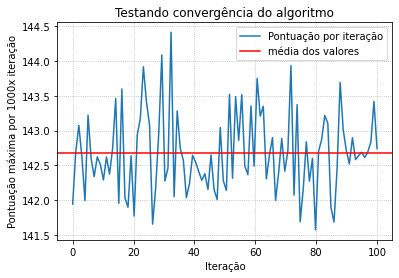

In [129]:
import matplotlib.pyplot as plt

x = np.linspace(0, max_it, max_it)

fig, ax = plt.subplots()
ax.set(title='Testando convergência do algoritmo', xlabel='Iteração', ylabel='Pontuação máxima por 1000x iteração')
ax.plot(x, burros_resultados, label='Pontuação por iteração')
ax.axhline(sum(burros_resultados)/max_it, label = 'média dos valores', color = 'r')
ax.legend()
ax.grid(linestyle = 'dotted')

Até que "converge" pra um valor legal 